## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline 

## Load Dataset

In [4]:
data = pd.read_csv('creditcard.csv')
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
count_classes

0    284315
1       492
Name: Class, dtype: int64

Text(0,0.5,'Frequecy')

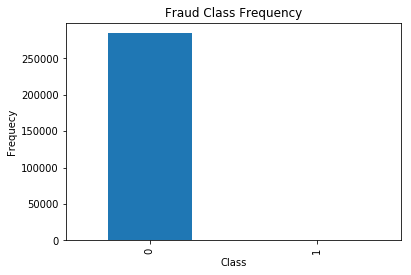

In [6]:
count_classes.plot(kind='bar')
plt.title('Fraud Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequecy')

## Normalize Amount Column

In [7]:
from sklearn import preprocessing
data['normAmount'] = preprocessing.StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Data Resampling

In [60]:
x = data.ix[:,data.columns!='Class']
y = data.ix[:, data.columns == 'Class']

In [44]:
# Number of data points in minority class
number_records_fraud = len(data[data.Class==1])
fraud_indices = np.array(data[data.Class == 1].index)

# picking the indices fo the normal class
normal_indices = np.array(data[data.Class==0].index)

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices,number_records_fraud, replace= False)
random_normal_indices = np.array(random_normal_indices)

# appending the two indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

#undersample data
under_sample_data = data.iloc[under_sample_indices,:]


x_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data[under_sample_data.Class == 0]))


('Percentage of normal transactions: ', 0)
('Percentage of fraud transactions: ', 0)
('Total number of transactions in resampled data: ', 492)


/home/bnitish/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


## Split Data into Training and Test Set

In [45]:
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print("Number transactions train dataset: ", len(x_train))
print("Number transactions test dataset: ", len(x_test))
print("Total number of transactions: ", len(x_train)+len(x_test))

#undersampled Dataset
x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample = train_test_split(x_undersample,y_undersample,test_size=0.3,random_state=0)

print("Number transactions train dataset: ", len(x_train_undersample))
print("Number transactions test dataset: ", len(x_test_undersample))
print("Total number of transactions: ", len(x_train_undersample)+len(x_test_undersample))

('Number transactions train dataset: ', 199364)
('Number transactions test dataset: ', 85443)
('Total number of transactions: ', 284807)
('Number transactions train dataset: ', 688)
('Number transactions test dataset: ', 296)
('Total number of transactions: ', 984)


## Logistics Regression Classifier

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [52]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    #best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    best_c = results_table
    best_c.dtypes.eq(object) # you can see the type of best_c
    new = best_c.columns[best_c.dtypes.eq(object)] #get the object column of the best_c
    best_c[new] = best_c[new].apply(pd.to_numeric, errors = 'coerce', axis=0) # change the type of object
    best_c
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter'] #calculate the mean values
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [53]:
best_c = printing_Kfold_scores(x_train_undersample,y_train_undersample)

-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.9315068493150684)
('Iteration ', 2, ': recall score = ', 0.9178082191780822)
('Iteration ', 3, ': recall score = ', 0.9830508474576272)
('Iteration ', 4, ': recall score = ', 0.972972972972973)
('Iteration ', 5, ': recall score = ', 0.9545454545454546)

('Mean recall score ', 0.9519768686938409)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.8493150684931506)
('Iteration ', 2, ': recall score = ', 0.8767123287671232)
('Iteration ', 3, ': recall score = ', 0.9322033898305084)
('Iteration ', 4, ': recall score = ', 0.9459459459459459)
('Iteration ', 5, ': recall score = ', 0.9090909090909091)

('Mean recall score ', 0.9026535284255275)

-------------------------------------------
('C parameter: ', 1)
-------------------------------

/home/bnitish/.local/lib/python2.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Iteration ', 2, ': recall score = ', 0.9041095890410958)
('Iteration ', 3, ': recall score = ', 0.9661016949152542)
('Iteration ', 4, ': recall score = ', 0.9594594594594594)
('Iteration ', 5, ': recall score = ', 0.9242424242424242)

('Mean recall score ', 0.9288648253124686)

*********************************************************************************
('Best model to choose from cross validation is with C parameter = ', 0.01)
*********************************************************************************


## Evaluation using confusion matrix

In [54]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

('Recall metric in the testing dataset: ', 0)


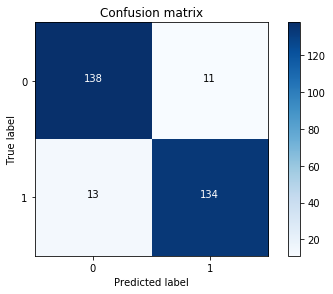

In [57]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(x_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(x_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Plot ROC curve and precision recall curve

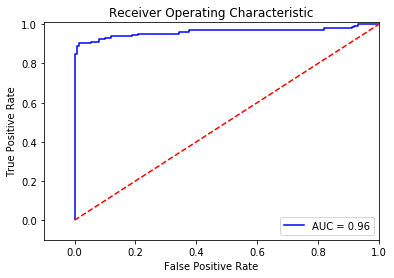

In [59]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(x_train_undersample,y_train_undersample.values.ravel()).decision_function(x_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()